In [1]:
from pprint import pprint
from base import *

import matplotlib.pyplot as plt

## Check STORAGE and CUSTOM_SCR in setting.py

In [2]:
# STORAGE is data directory
# CUSTOM_SCR is directory which has read parameters and functions
!cat ./setting.py

# STORAGE = '../storage'
# CUSTOM_SCR = 'custom'

# for example1
STORAGE = '../storage_example1'
CUSTOM_SCR = 'custom_example1'


In [3]:
!ls ./../storage_example1

README.md a1_b1.txt a1_b2.txt a2_b1.txt a2_b2.txt cache


## Read log files

In [4]:
!python3 load_storage.py

INFO:load_storage.py:<module>:save cache files in ../storage_example1/cache
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1112.33it/s]
INFO:load_storage.py:save_database:size is 4


## Database Operations

In [5]:
root = '../storage_example1/cache'  # cache directory ( see in --root argument of load_storage.py )
database = Database(root)

### Check Parameters

In [6]:
# display loadable data
database.params

{Param(a='a1', b='b1'),
 Param(a='a1', b='b2'),
 Param(a='a2', b='b1'),
 Param(a='a2', b='b2')}

### Interactive (automatic) dataset loading

In [7]:
# display loaded data
print(database)

Empty DataFrame
Columns: []
Index: []


In [8]:
# load (a, b) = (a1, b1) dataset
database['a1', 'b1']
print(database)

    a   b  size                       seq_data global_data
0  a1  b1     4  ../storage_example1/a1_b1.txt        None


In [9]:
# load (a, b) = (a1, b2) dataset
database[Param(a='a1', b='b2')]
print(database)

    a   b  size                       seq_data global_data
0  a1  b1     4  ../storage_example1/a1_b1.txt        None
1  a1  b2     3  ../storage_example1/a1_b2.txt        None


### Free loaded dataset

In [10]:
database.free()
print(database)

Empty DataFrame
Columns: []
Index: []


### Extruct database

In [11]:
# extract (a, b) = ('a1', 'b1') data
sub_database = database.sub(a='a1', b='b1')
print(sub_database)

    a   b  size                       seq_data global_data
0  a1  b1     4  ../storage_example1/a1_b1.txt        None


In [12]:
# show detail
sub_database.datas[Param(a='a2', b='b2')]

Dataset("LoadSet(LoadSetElement(file='../storage_example1/a2_b2.txt', read_func=<function read at 0x11f76dca0>), None)")

In [13]:
# show more detail
sub_database.datas[Param(a='a2', b='b2')].datas

[AttrDict({'time': 0.0, 'value': 10.0}),
 AttrDict({'time': 2.0, 'value': 15.0}),
 AttrDict({'time': 10.0, 'value': 20.0})]

In [14]:
# show more detail
dataset = sub_database[Param(a='a2', b='b2')]
pprint(dataset.datas)

[AttrDict({'time': 0.0, 'value': 10.0}),
 AttrDict({'time': 2.0, 'value': 15.0}),
 AttrDict({'time': 10.0, 'value': 20.0})]


### multi-process processing

In [15]:
database.free()
print(database)

Empty DataFrame
Columns: []
Index: []


In [16]:
print(database.params)

{Param(a='a1', b='b1'), Param(a='a2', b='b2'), Param(a='a1', b='b2'), Param(a='a2', b='b1')}


In [17]:
# set the number of processes
database.setProcesses(2)
database.setTqdm()
print(database)

Empty DataFrame
Columns: []
Index: []


In [18]:
# load all datas with parallel
database.setAll()

100%|██████████| 4/4 [00:01<00:00,  3.91it/s]


### Diff

In [19]:
# create diff about value for all dataset
database.diff('value', n=1)
database.diff('time', n=1)
# check one dataset
database[Param(a='a1', b='b1')].toDataFrame()

,time,value,diff_value,diff_time,a,b
0,1.0,2.0,NaN,NaN,a1,b1
1,3.0,9.0,7.0,2.0,a1,b1
2,10.0,10.0,1.0,7.0,a1,b1
3,12.0,15.0,5.0,2.0,a1,b1


### Self-operation for dataset 

In [20]:
# self-operation; key is dataset
def add_row(dataset):
    for data in dataset:
        data['test'] = True  # add test column
        
database.operation(add_row)
# check one dataset
database[Param(a='a1', b='b1')].toDataFrame()

100%|██████████| 4/4 [00:00<00:00, 43919.41it/s]


,time,value,diff_value,diff_time,test,a,b
0,1.0,2.0,NaN,NaN,True,a1,b1
1,3.0,9.0,7.0,2.0,True,a1,b1
2,10.0,10.0,1.0,7.0,True,a1,b1
3,12.0,15.0,5.0,2.0,True,a1,b1


### Reduce datasets

In [35]:
sub_database.sub(param=Param(a='a1', b='b1'))
dataset = sub_database.reduce('time', items=['value'], num=10)  # reduce with key=time
dataset.toDataFrame()

,time,value
0,1.000000,NaN
1,2.222223,2.0
2,3.444447,2.0
3,4.666670,4.5
4,5.888893,5.0
5,7.111117,5.0
6,8.333340,5.0
7,9.555563,5.0
8,10.777787,5.0
9,12.000010,6.0


## Line Plot

we have time-series data with parameter a and b, such that

|    | a  | b  |
|:--:|:--:|:--:|
|1   |a1  |b1  |
|2   |a1  |b2  |
|3   |a2  |b1  |
|4   |a2  |b2  |

### plot one data

[{'diff_time': None,
  'diff_value': None,
  'test': True,
  'time': 1.0,
  'value': 2.0},
 {'diff_time': 2.0,
  'diff_value': 7.0,
  'test': True,
  'time': 3.0,
  'value': 9.0},
 {'diff_time': 7.0,
  'diff_value': 1.0,
  'test': True,
  'time': 10.0,
  'value': 10.0},
 {'diff_time': 2.0,
  'diff_value': 5.0,
  'test': True,
  'time': 12.0,
  'value': 15.0}]


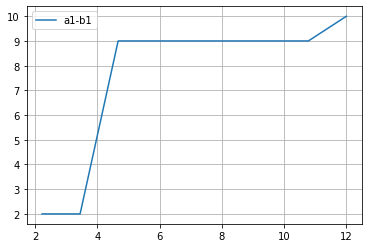

In [23]:
sub_database = database.sub(a='a1', b='b1')
pprint(sub_database.toDataset().datas)
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b1',
    xnum=10,
)
ax.legend()
ax.grid('--')

[{'diff_time': None,
  'diff_value': None,
  'test': True,
  'time': 3.0,
  'value': 0.0},
 {'diff_time': 1.0,
  'diff_value': 1.0,
  'test': True,
  'time': 4.0,
  'value': 1.0},
 {'diff_time': 6.0,
  'diff_value': 1.0,
  'test': True,
  'time': 10.0,
  'value': 2.0}]


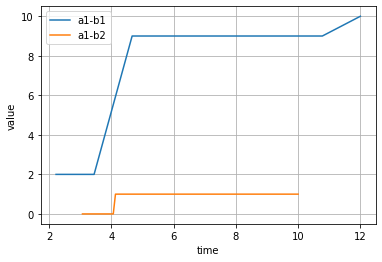

In [24]:
# add line
sub_database = database.sub(a='a1', b='b2')
pprint(sub_database.datas['a1', 'b2'].datas)

sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b2',
    fig=fig, ax=ax  # specify the fig, ax object overwrited
)

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('value')

fig

### Extruct multi database

In [25]:
sub_database = database.sub(a='a1')
print(sub_database)

    a   b  size                       seq_data global_data
0  a1  b1     4  ../storage_example1/a1_b1.txt        None
1  a1  b2     3  ../storage_example1/a1_b2.txt        None


### meanplot

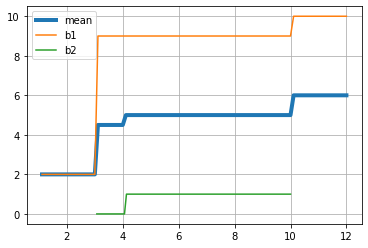

In [26]:
# plot the average of two datasets
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='mean',
    plot_type='meanplot',
    linewidth=4,
)

# ( sub plot )
sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)

ax.grid('--')
ax.legend()
# fig

#### plot mean with not extended data for each dataset

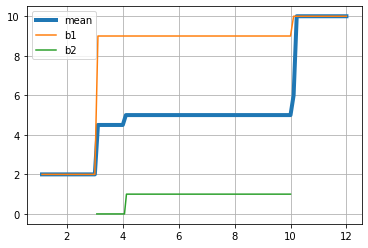

In [27]:
# plot the average of two datasets
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='mean',
    plot_type='meanplot',
    linewidth=4,
    extend=False,
)

# ( sub plot )
sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)

ax.grid('--')
ax.legend()
# fig

#### plot mean only overwraped with not extended data for each dataset

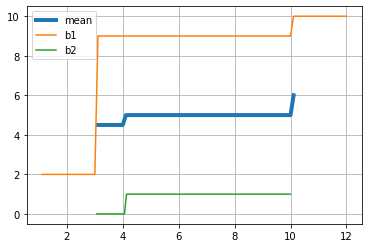

In [28]:
# plot the average of two datasets
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='mean',
    plot_type='meanplot',
    linewidth=4,
    extend=False,
    overwrap=1.0,
)

# ( sub plot )
sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)

ax.grid('--')
ax.legend()
# fig

### maxplot

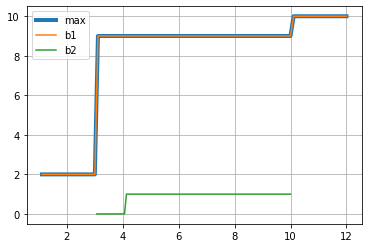

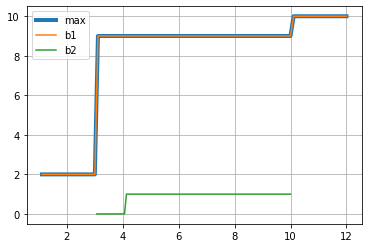

In [29]:
# plot the max of two datasets
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='max',
    plot_type='maxplot',
    linewidth=4,
)
sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)
ax.grid('--')
ax.legend()
fig

### minplot

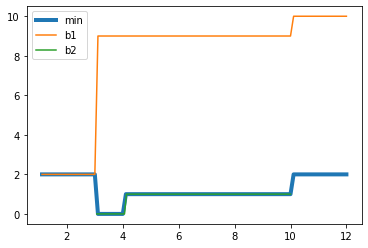

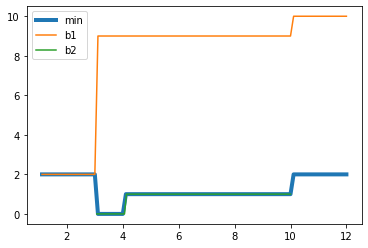

In [30]:
# plot the min of two datasets
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='min',
    plot_type='minplot',
    linewidth=4,
)
sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)
ax.legend()
fig

## Scatter Plot

In [31]:
sub_database = database.sub(a='a1')
print(sub_database)

    a   b  size                       seq_data global_data
0  a1  b1     4  ../storage_example1/a1_b1.txt        None
1  a1  b2     3  ../storage_example1/a1_b2.txt        None


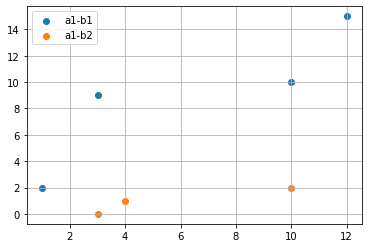

In [32]:
fig, ax = sub_database.sub(b='b1').scatterplot(
    xitem='time',
    yitem='value',
    label='a1-b1',
)
sub_database.sub(b='b2').scatterplot(
    xitem='time',
    yitem='value',
    label='a1-b2',
    fig=fig, ax=ax,
)
ax.legend()
ax.grid('--')

## Hist Plot

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x120b99c70>)

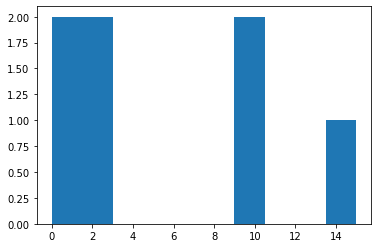

In [33]:
sub_database.histplot(
    item='value'
)